In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [7]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# check null values and data types

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# check duplicates

In [15]:
sum(red_wine.duplicated())

240

In [16]:
sum(white_wine.duplicated())

937

In [23]:
#unique values of quality in red wine dataset
len(red_wine['quality'].unique())

6

In [24]:
#unique values of quality in white wine dataset
len(white_wine['quality'].unique())

7

In [25]:
#mean density in red wine dataset
red_wine['density'].mean()

0.9967466791744831

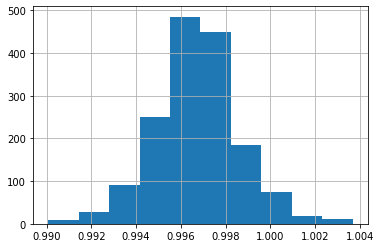

In [27]:
red_wine['density'].hist();

# combine in wine_df
To analyze the data more quickly, let's combine the red and white wine data sets into one dataframe. To do this we will add a new feature or column to each data set to indicate whether the wine is red or white. This will help us keep track once the data sets are combined.

In [28]:
red_wine['color'] = 'red'

In [29]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [30]:
white_wine['color'] = 'white'
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [33]:
# append dataframes
wine_df = red_wine.append(white_wine, sort=False)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [34]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [35]:
wine_df.to_csv('winequality_edited.csv', sep=';')

In [36]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


# explore with visuals

In [40]:
#pd.plotting.scatter_matrix(wine_df, alpha=0.2);

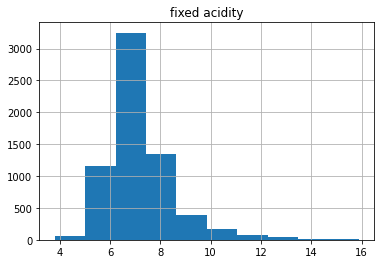

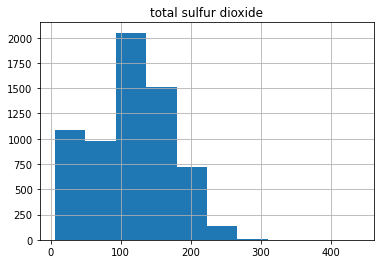

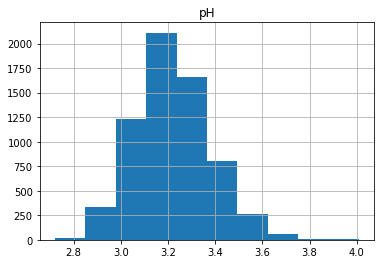

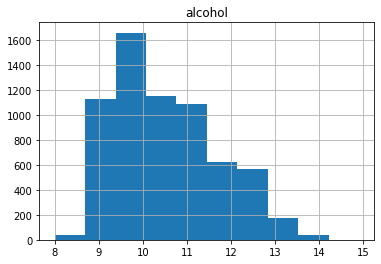

In [45]:
cols = ['fixed acidity', 'total sulfur dioxide', 'pH', 'alcohol']
for col in cols:
    wine_df[col].hist()
    plt.title(col)
    plt.show()
    

# scatter plot aganist quality

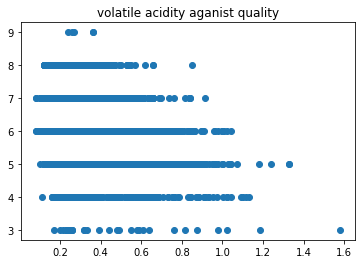

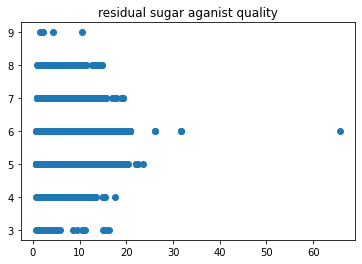

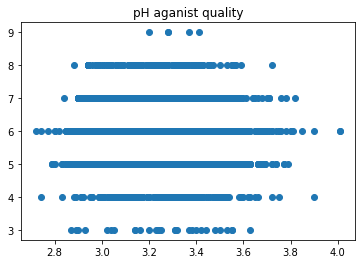

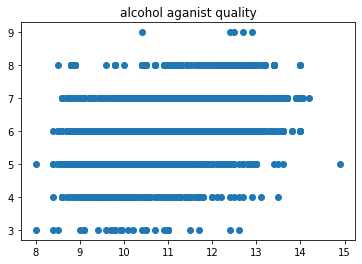

In [48]:
cols = ['volatile acidity', 'residual sugar', 'pH', 'alcohol']
for col in cols:
    plt.scatter(wine_df[col], wine_df['quality'])
    plt.title(col+" aganist quality")
    plt.show()

# Q1: Is a certain type of wine (red or white) associated with higher quality?

In [50]:
wine_df.groupby(['color'])['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

# Q2: What level of acidity (pH value) receives the highest average rating?

In [69]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [71]:
# create a new column with acidity levels
"""Acidity Levels:

    High: Lowest 25% of pH values
    Moderately High: 25% - 50% of pH values
    Medium: 50% - 75% of pH values
    Low: 75% - max pH value
"""
labels=['high', 'mod_high', 'medium', 'low']

#Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bins= bin_edges, labels=labels)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [72]:
wine_df.groupby(['color','acidity levels'])['quality'].mean()

color  acidity levels
red    high              5.692308
       mod_high          5.676157
       medium            5.670429
       low               5.588798
white  high              5.791614
       mod_high          5.806902
       medium            5.922252
       low               6.095012
Name: quality, dtype: float64

In [73]:
wine_df.groupby(['acidity levels'])['quality'].mean()

acidity levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

# Drawing Conclusions Using Query

# Q1: Do wines with higher alcoholic content receive better ratings?

In [83]:
alcohol_median = wine_df['alcohol'].median()
print(alcohol_median)

10.3


In [85]:
low_alcohol = wine_df.query('alcohol < 10.3')
low_alcohol['quality'].mean()

5.475920679886686

In [97]:
high_alcohol = wine_df.query('alcohol >= 10.3')
high_alcohol['quality'].mean()

6.146084337349397

# Q2: Do sweeter wines (more residual sugar) receive better ratings?

In [101]:
"""# select samples with residual sugar less than the median
low_sugar = df.query('residual_sugar < 3')

# select samples with residual sugar greater than or equal to the median
high_sugar = df.query('residual_sugar >= 3')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True"""

"# select samples with residual sugar less than the median\nlow_sugar = df.query('residual_sugar < 3')\n\n# select samples with residual sugar greater than or equal to the median\nhigh_sugar = df.query('residual_sugar >= 3')\n\n# ensure these queries included each sample exactly once\nnum_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True"

In [98]:
sugar_median = wine_df['residual sugar'].median()
print(sugar_median)

3.0


In [99]:
low_sugar = wine_df[wine_df['residual sugar'] < 3.0]
low_sugar['quality'].mean()

5.808800743724822

In [100]:
high_sugar = wine_df[wine_df['residual sugar'] >= 3.0]
high_sugar['quality'].mean()

5.82782874617737

# plotting color and quality

In [102]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'Quality')

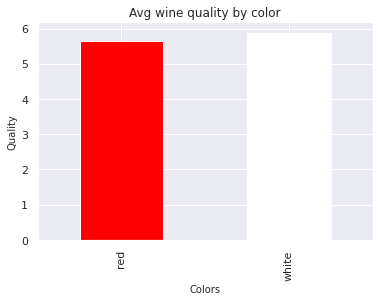

In [105]:
colors = ['red', 'white']
color_quality = wine_df.groupby(['color'])['quality'].mean()
color_quality.plot(kind='bar', title='Avg wine quality by color', color = colors)
plt.xlabel('Colors', fontsize=10)
plt.ylabel('Quality', fontsize=10)

# plot

In [112]:
counts = wine_df.groupby(['quality', 'color']).count().iloc[:,0]
counts

quality  color
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: fixed acidity, dtype: int64

Text(0, 0.5, 'Count')

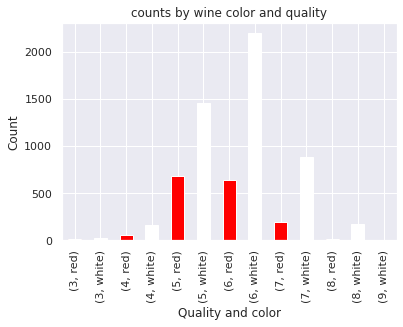

In [114]:
# not the best since the number of white wine is much larger than of red wine
counts.plot(kind='bar', color=colors, title='counts by wine color and quality')
plt.xlabel('Quality and color')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

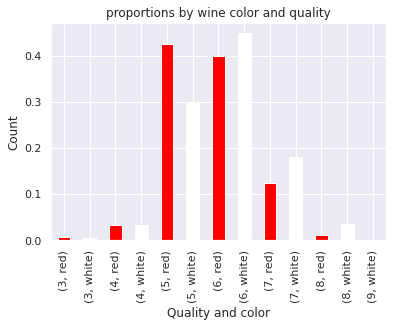

In [115]:
totals = wine_df.groupby('color').count()['pH']
proportions = counts / totals
proportions.plot(kind='bar', color=colors, title='proportions by wine color and quality')
plt.xlabel('Quality and color')
plt.ylabel('Count')

# 1: Do wines with higher alcoholic content receive better ratings?

In [117]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

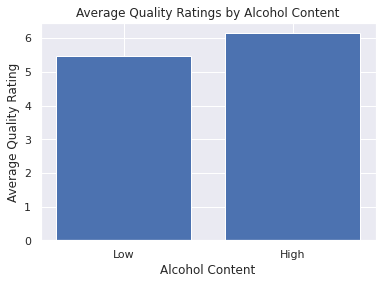

In [118]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

# 2: Do sweeter wines receive higher ratings?

Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.


In [126]:
sugar_median = wine_df['residual sugar'].median()
low_sugar = wine_df[wine_df['residual sugar'] < 3.0]
high_sugar = wine_df[wine_df['residual sugar'] >= 3.0]
low_sugar_mean = low_sugar['quality'].mean()
high_sugar_mean = high_sugar['quality'].mean()

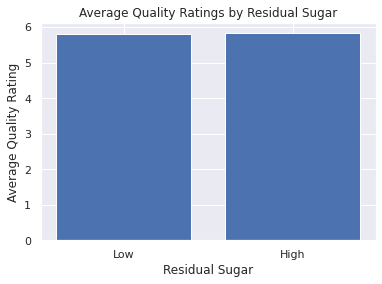

In [127]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [low_sugar_mean, high_sugar_mean]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

# 3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [132]:
acidity_level_quality_means = wine_df.groupby('acidity levels')['quality'].mean()
acidity_level_quality_means

acidity levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

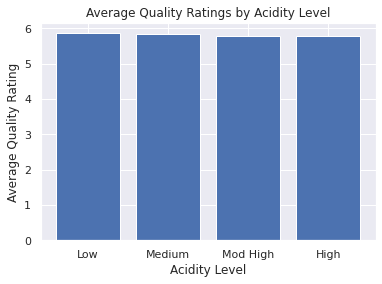

In [136]:
# Create a bar chart with proper labels
locations = [4, 3, 2, 1] 
heights = acidity_level_quality_means

#labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

# color and quality plot

In [137]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [138]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [139]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [140]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

set the x coordinate loc for each rating group and width of each bar

In [149]:
#ind = np.arange(len(red_proportions))  # the x locations for the groups
#width = 0.35       # the width of the bars
## plot bars
#red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
#white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
#plt.ylabel('Proportion')
#plt.xlabel('Quality')
#plt.title('Proportion by Wine Color and Quality')
#locations = ind + width / 2  # xtick locations
#labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
#plt.xticks(locations, labels)

# legend
#plt.legend()
"""Oh, that didn't work 
because we're missing a red wine value for a the 9 rating.
Even though this number is a 0, we need it for our plot.."""

"Oh, that didn't work \nbecause we're missing a red wine value for a the 9 rating.\nEven though this number is a 0, we need it for our plot.."

In [144]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

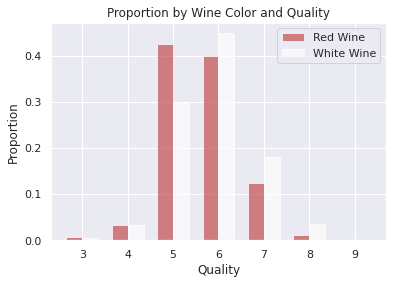

In [152]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
#width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()